In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df['rest_type'].head()

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [4]:

df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [5]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [6]:
df['approx_cost(for two people)'].describe()

count     51371
unique       70
top         300
freq       7576
Name: approx_cost(for two people), dtype: object

In [7]:
import streamlit as st
st.write("hello")

2024-04-26 12:08:24.764 
  command:

    streamlit run C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Load the CSV file into a DataFrame
# file_path = 'zomato copy.csv'  # Replace 'your_dataset.csv' with the path to your CSV file
# df = pd.read_csv(file_path)

# Remove rows with missing values in 'approx_cost(for two people)' and 'rate' columns
df = df.dropna()
df_rate = df[(df['rate'] != 'NEW') & (df['rate'] != '-')]
# Convert 'rate' column to numeric
df_rate['rate'] = df_rate['rate'].str.split('/').str[0]
df_rate['rate'] = df_rate['rate'].astype(float)
# df['rate'] = df['rate'].replace({'NEW': None, '-': None}).astype(float)

# Convert 'approx_cost(for two people)' column to numeric
df = df['approx_cost(for two people)'].str.replace(',', '')
df = df['approx_cost(for two people)'].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df_rate['rate'], alpha=0.5)
plt.title('Rating vs Approx Cost for Two People')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')

x_ticks = np.arange(0, 6001, 500)
plt.xticks(x_ticks)

# plt.grid(True)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18152\1467693601.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate['rate'] = df_rate['rate'].str.split('/').str[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18152\1467693601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate['rate'] = df_rate['rate'].astype(float)


KeyError: 'approx_cost(for two people)'

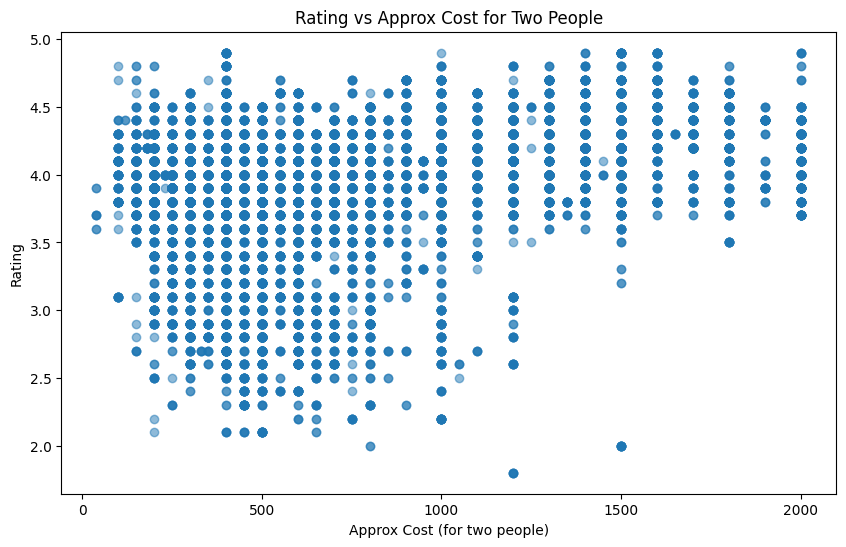

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
file_path = 'zomato.csv'  # Replace 'your_dataset.csv' with the path to your CSV file
df = pd.read_csv(file_path)

# Drop rows with missing values in 'approx_cost(for two people)' and 'rate' columns
df = df.dropna()

# Filter out rows where 'rate' is "NEW" or "-"
df = df[(df['rate'] != 'NEW') & (df['rate'] != '-')]

# Convert 'approx_cost(for two people)' column to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Remove rows with 'approx_cost(for two people)' greater than 4000
df = df[df['approx_cost(for two people)'] <= 2000]

# Extract numeric part of 'rate' column before the backslash
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], alpha=0.5)
plt.title('Rating vs Approx Cost for Two People')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)

# Set custom x-axis ticks
x_ticks = np.arange(0, 2001, 500)
plt.xticks(x_ticks)

# Show the plot
plt.show()


* k-means

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


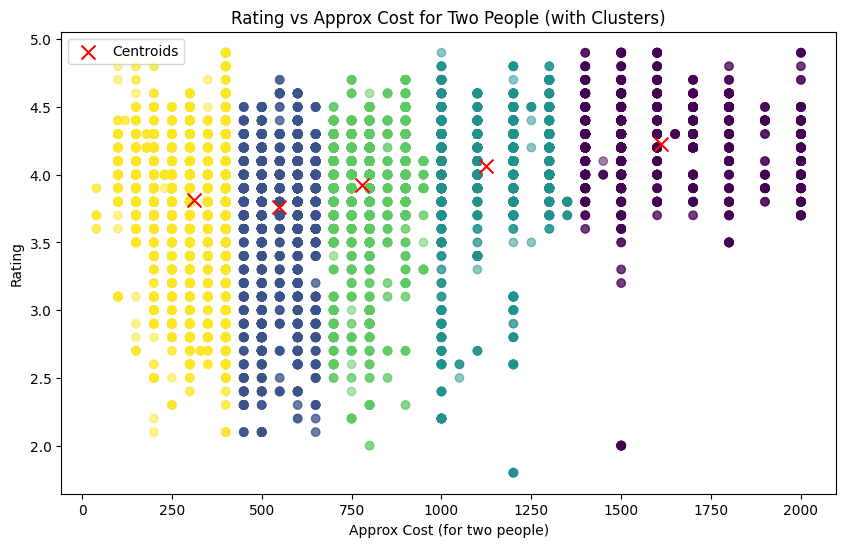

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering
X = df[['approx_cost(for two people)', 'rate']].values
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Rating vs Approx Cost for Two People (with Clusters)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)
plt.legend()
plt.show()

* dbscan

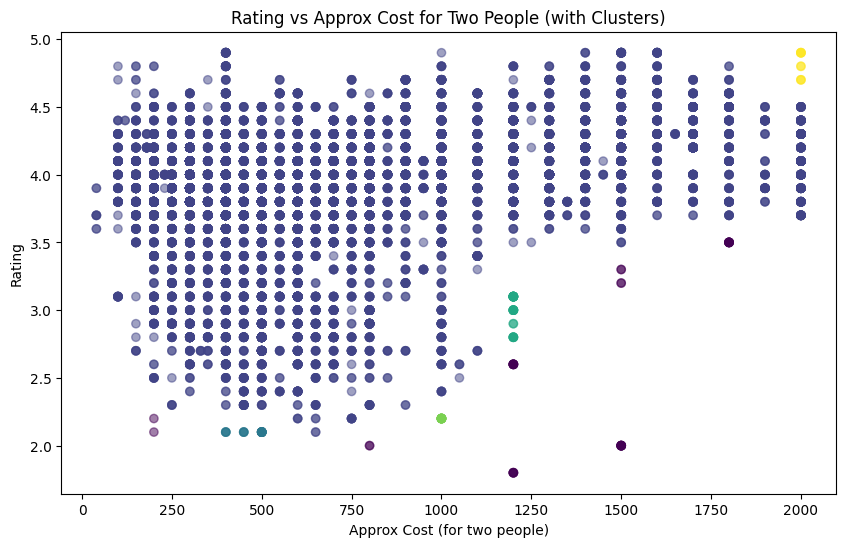

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Perform DBSCAN clustering
X = df[['approx_cost(for two people)', 'rate']].values
X = StandardScaler().fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=labels, cmap='viridis', alpha=0.5)
plt.title('Rating vs Approx Cost for Two People (with Clusters)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)
plt.show()

* gaussian mixture model

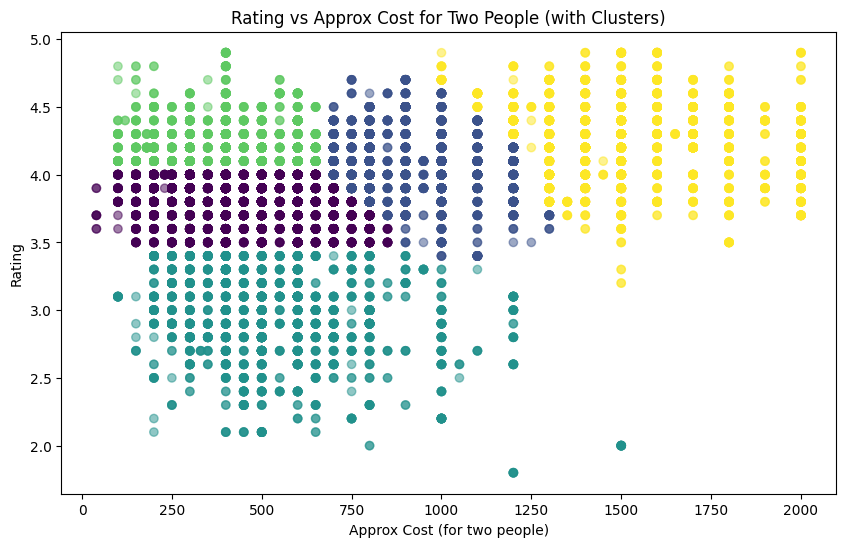

In [ ]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Model (GMM) clustering
X = df[['approx_cost(for two people)', 'rate']].values
X = StandardScaler().fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance
gmm = GaussianMixture(n_components=5, random_state=42)
labels = gmm.fit_predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=labels, cmap='viridis', alpha=0.5)
plt.title('Rating vs Approx Cost for Two People (with Clusters)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)
plt.show()

* heirarchial agglomerative clustering 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical agglomerative clustering
X = df[['approx_cost(for two people)', 'rate']].values.astype(float)
Z = linkage(X, method='ward')  # Using Ward's method for linkage

# Plotting dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

MemoryError: Unable to allocate 1.89 GiB for an array with shape (253361305,) and data type float64

* PCA - rate and no of votes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convert 'rate' column to numeric
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) else x)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['rate', 'votes']])

# Apply PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_data)

# # Add PCA result as a new column to the DataFrame
df['pca_component'] = principal_components
df['pca_component']
# # Display the DataFrame with PCA result
# print(df.head())

0        0.448398
1        0.456029
2        0.042978
3       -0.650270
4       -0.435219
           ...   
51704   -0.089690
51705   -0.459383
51707   -0.326362
51708   -2.092911
51711   -2.640137
Name: pca_component, Length: 22511, dtype: float64

* FP growth

In [ ]:
import pyfpgrowth

# Convert the 'rest_type' column to a list of lists
transactions = df['rest_type'].apply(lambda x: x.split(',')).tolist()

# Perform FP-growth algorithm to find frequent itemsets
patterns = pyfpgrowth.find_frequent_patterns(transactions, 50)  # Adjust the support threshold as needed

# Print the frequent itemsets
for itemset, support in patterns.items():
    print(f"Itemset: {itemset}, Support: {support}")

Itemset: ('Fine Dining',), Support: 70
Itemset: (' Beverage Shop',), Support: 80
Itemset: (' Microbrewery',), Support: 128
Itemset: (' Microbrewery', 'Pub'), Support: 66
Itemset: (' Pub',), Support: 161
Itemset: (' Pub', 'Casual Dining'), Support: 124
Itemset: (' Bakery',), Support: 185
Itemset: (' Bakery', 'Cafe'), Support: 128
Itemset: ('Sweet Shop',), Support: 190
Itemset: (' Quick Bites', 'Sweet Shop'), Support: 88
Itemset: ('Microbrewery',), Support: 199
Itemset: (' Casual Dining', 'Microbrewery'), Support: 121
Itemset: ('Food Court',), Support: 252
Itemset: (' Dessert Parlor', 'Quick Bites'), Support: 55
Itemset: (' Dessert Parlor', 'Bakery'), Support: 62
Itemset: (' Dessert Parlor', 'Cafe'), Support: 107
Itemset: ('Lounge',), Support: 309
Itemset: ('Beverage Shop',), Support: 332
Itemset: (' Quick Bites', 'Beverage Shop'), Support: 134
Itemset: (' Delivery',), Support: 341
Itemset: (' Delivery', 'Takeaway'), Support: 341
Itemset: ('Takeaway',), Support: 354
Itemset: (' Cafe', 'B

In [ ]:
def loc():
    file_path = 'zomato copy.csv'  
    df = pd.read_csv(file_path)
    df = df.dropna()
    # Get unique locations from the DataFrame
    locations = [''] + list(df['location'].unique())
    
    df = df[(df['rate'] != 'NEW') & (df['rate'] != '-')]
    df['rate'] = df['rate'].str.split('/').str[0].astype(float)
     # Convert 'rate' column to numeric
    # df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) else x)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[['rate', 'votes']])

    # Apply PCA
    pca = PCA(n_components=1)
    principal_components = pca.fit_transform(scaled_data)

    # # Add PCA result as a new column to the DataFrame
    df['pca_component'] = principal_components

    # Streamlit app
    st.title('Location Selection')
    selected_location = st.selectbox('Select Location', locations)

    # Display selected location
    st.write('You selected:', selected_location)

    # Filter restaurants based on selected location
    filtered_restaurants = df[df['location'] == selected_location]

    # Sort restaurants by rating in decreasing order
    sorted_restaurants = filtered_restaurants.sort_values(by='pca_component', ascending=False)

    # Retrieve top 10 restaurants
    top_10_restaurants = sorted_restaurants.head(10)
    return top_10_restaurants, selected_location
    # Display only name and URL of filtered restaurants

In [ ]:

if st.button('Location based retrieval system'):
        top_10,input_location = loc()
        st.subheader('Top 10 Restaurants in {}'.format(input_location))
        for row in top_10.iterrows():
            st.markdown('Name: {} '.format(row['name']))
            st.markdown('URL: {}'.format(row['url']))  

2024-04-25 12:31:38.894 
  command:

    streamlit run C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


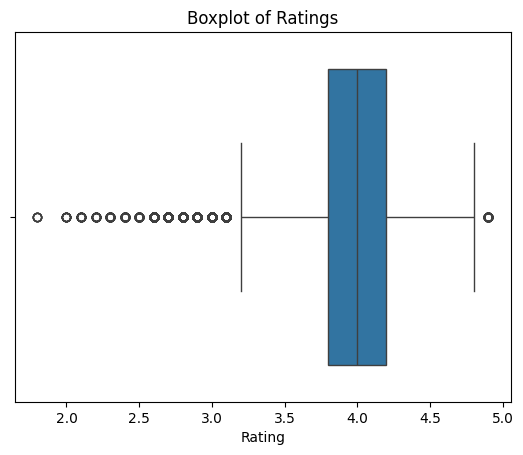

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
import seaborn as sns

# Assuming df is your DataFrame
sns.boxplot(x=df['rate'], data=df)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()


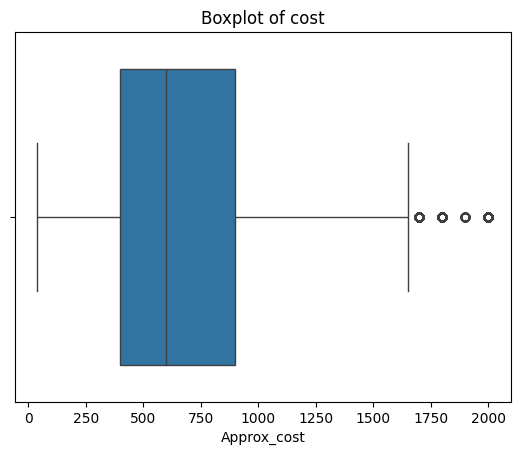

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame
sns.boxplot(x=df['approx_cost(for two people)'], data=df)
plt.title('Boxplot of cost')
plt.xlabel('Approx_cost')
plt.show()

# plt.boxplot(df['approx_cost(for two people)'])

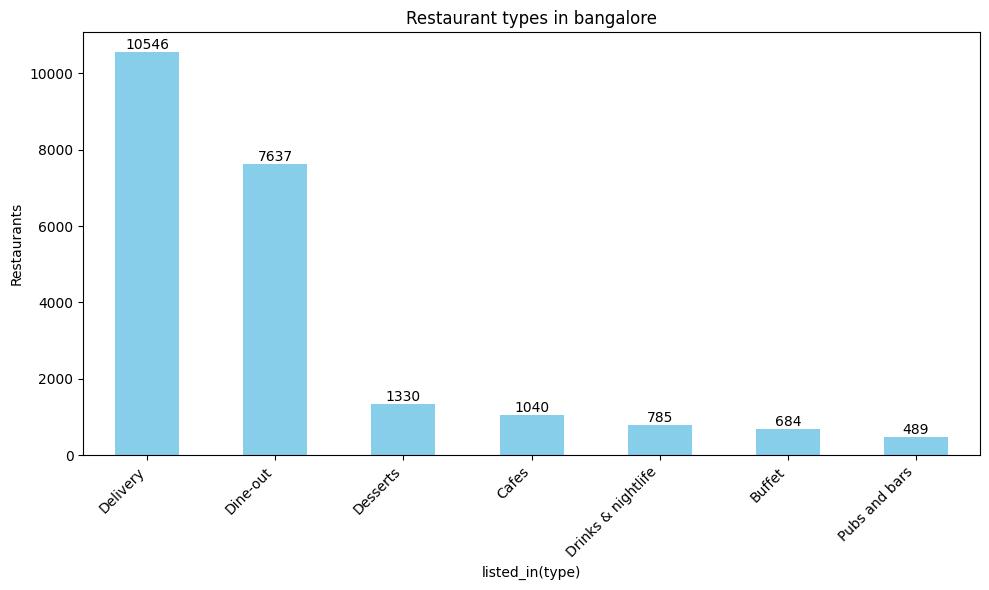

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of each unique value
value_counts = df['listed_in(type)'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Restaurant types in bangalore')
# plt.xlabel('Unique Values')
plt.ylabel('Restaurants')

# Add value labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df=pd.read_csv('zomato.csv')
df['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [ ]:
df['dish_liked_list']=list(df['dish_liked'])
print(df['dish_liked_list'])

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked_list, Length: 51717, dtype: object


In [ ]:
!pip install prefixspan


  Using cached prefixspan-0.5.2-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached extratools-0.8.2.1.tar.gz (25 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28928 sha256=1dadcf8f5d677067011cc6c063d33a9c469fd899004218d78c0165fbbbea3616
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\a8\79\68\6f2edcddbadb15fdcff02e0748a05579d52e7

In [ ]:
class PrefixSpan:
    def __init__(self, min_support):
        self.min_support = min_support
        self.patterns = []

    def _prefix_span(self, projected_database, pattern):
        # Count occurrences of the first item in the projected database
        first_item_counts = {}
        for sequence in projected_database:
            if len(sequence) > 0:
                if sequence[0] not in first_item_counts:
                    first_item_counts[sequence[0]] = 1
                else:
                    first_item_counts[sequence[0]] += 1

        # Generate new patterns and add them to the result
        for item, count in first_item_counts.items():
            new_pattern = pattern + [item]
            if count >= self.min_support:
                self.patterns.append(new_pattern)
                print("Found frequent pattern:", new_pattern)

            # Project the database for the current item
            new_projected_database = [seq[1:] for seq in projected_database if len(seq) > 1 and seq[0] == item]
            if len(new_projected_database) > 0:
                self._prefix_span(new_projected_database, new_pattern)

    def mine_patterns(self, sequences):
        self.patterns = []
        self._prefix_span(sequences, [])
        return self.patterns



# Example usage:
if __name__ == "__main__":
    # Example sequences
    # sequences = [
    #     [1, 2, 3, 4],
    #     [1, 3, 4],
    #     [2, 4],
    #     [2, 3],
    #     [1, 2, 4]
    # ]

    # Convert 'dish_liked_list' column to strings
    df['dish_liked_list'] = df['dish_liked_list'].astype(str)
    # Convert string representations of sequences to lists of items
    sequences = df['dish_liked_list'].apply(lambda x: [int(item) for item in x.split(',') if item.isdigit()])
    print(sequences)
    # Remove empty sequences
    sequences = sequences[sequences.apply(len) > 0]

    # Minimum support
    min_support = 100

    prefix_span = PrefixSpan(min_support)
    patterns = prefix_span.mine_patterns(sequences)
    print("Frequent Patterns:")
    for pattern in patterns:
        print(pattern)



0        []
1        []
2        []
3        []
4        []
         ..
51712    []
51713    []
51714    []
51715    []
51716    []
Name: dish_liked_list, Length: 51717, dtype: object
Frequent Patterns:


In [ ]:
import pandas as pd
from prefixspan import PrefixSpan

# Read data from CSV file
data = pd.read_csv('zomato.csv')

# Extract the 'dish_liked' column
dish_liked_column = data['dish_liked']

# Clean up values: remove leading/trailing whitespace and split by commas
dish_liked_column = dish_liked_column.str.strip().str.split(',')

# Get unique dishes
unique_dishes = set()
for dishes in dish_liked_column:
    if isinstance(dishes, list):
        unique_dishes.update(dishes)

# Mapping of categories to numerical values
category_to_num = {dish: i+1 for i, dish in enumerate(unique_dishes)}

# Convert categorical data to numerical data
numerical_data = [[category_to_num[dish] for dish in sequence if dish.strip() in category_to_num] if isinstance(sequence, list) else [] for sequence in dish_liked_column]

# Apply PrefixSpan algorithm
ps = PrefixSpan(numerical_data)
patterns = ps.frequent(250)  # Mine frequent sequential patterns with minimum support 2

# Reverse mapping of numerical values to categories
num_to_category = {v: k for k, v in category_to_num.items()}

# Convert numerical patterns back to categorical values and print frequent sequential patterns
for support, numerical_pattern in patterns:
    categorical_pattern = [num_to_category[num] for num in numerical_pattern]
    print("Support:", support, "Pattern:", categorical_pattern)



Support: 672 Pattern: ['Pasta']
Support: 367 Pattern: [' Lunch Buffet']
Support: 275 Pattern: ['Momos']
Support: 483 Pattern: [' Paneer Tikka']
Support: 1019 Pattern: [' Chicken Biryani']
Support: 673 Pattern: [' Hot Chocolate']
Support: 273 Pattern: ['Masala Dosa']
Support: 2737 Pattern: [' Pasta']
Support: 345 Pattern: [' Pasta', ' Pizza']
Support: 349 Pattern: [' Pasta', ' Burgers']
Support: 1059 Pattern: [' Salads']
Support: 685 Pattern: [' Salad']
Support: 743 Pattern: [' Roti']
Support: 767 Pattern: ['Pizza']
Support: 345 Pattern: ['Pizza', ' Pasta']
Support: 1645 Pattern: [' Mocktails']
Support: 1189 Pattern: [' Coffee']
Support: 1211 Pattern: [' Nachos']
Support: 1296 Pattern: [' Sandwiches']
Support: 386 Pattern: ['Waffles']
Support: 669 Pattern: [' Momos']
Support: 794 Pattern: [' Sandwich']
Support: 1970 Pattern: [' Pizza']
Support: 253 Pattern: [' Pizza', ' Pasta']
Support: 805 Pattern: ['Coffee']
Support: 428 Pattern: [' Pancakes']
Support: 332 Pattern: [' Garlic Bread']
S

In [ ]:
import pandas as pd
from prefixspan import PrefixSpan

# Read data from CSV file
data = pd.read_csv('zomato.csv')

# Extract the 'dish_liked' column
rest_type_column = data['rest_type']

# Clean up values: remove leading/trailing whitespace and split by commas
rest_type_column = rest_type_column.str.strip().str.split(',')

# Get unique dishes
unique_dishes = set()
for dishes in rest_type_column:
    if isinstance(dishes, list):
        unique_dishes.update(dishes)

# Mapping of categories to numerical values
category_to_num = {dish: i+1 for i, dish in enumerate(unique_dishes)}

# Convert categorical data to numerical data
numerical_data = [[category_to_num[dish] for dish in sequence if dish.strip() in category_to_num] if isinstance(sequence, list) else [] for sequence in dish_liked_column]

# Apply PrefixSpan algorithm
ps = PrefixSpan(numerical_data)
patterns = ps.frequent(250)  # Mine frequent sequential patterns with minimum support 2

# Reverse mapping of numerical values to categories
num_to_category = {v: k for k, v in category_to_num.items()}

# Convert numerical patterns back to categorical values and print frequent sequential patterns
for support, numerical_pattern in patterns:
    categorical_pattern = [num_to_category[num] for num in numerical_pattern]
    print("Support:", support, "Pattern:", categorical_pattern)

